In [1]:
#  !pip -q install git+https://github.com/huggingface/transformers # need to install from github
# https://blog.paperspace.com/mistral-7b-fine-tuning/
# !pip install transformers trl langchain accelerate torch bitsandbytes peft datasets -qU
# !pip install -q datasets loralib sentencepiece xformers einops
!pip install -q -U peft==0.6.2 transformers==4.35.2 datasets==2.15.0 bitsandbytes==0.41.2.post2 trl==0.7.4 accelerate==0.24.1 wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## Parameter Efficient Fine Tuning with LoRA


https://heidloff.net/article/efficient-fine-tuning-lora/

https://towardsdatascience.com/implementing-lora-from-scratch-20f838b046f1

`verbatim`
PEFT, or Parameter-Efficient Fine-Tuning (PEFT), is a library for efficiently adapting pre-trained language models to downstream applications without without the need to re-train or fine-tune all the parameters. 

One main form of PEFT is LoRA:

Instead of adjusting the entire weight matrix (which is part of the linear transformations in the model's layers), LoRA introduces additional low-rank matrices that modify the original weight matrices in a more parameter-efficient manner. This process allows for targeted adaptations that significantly alter the model's behavior 

**SVD and matrix rank**
https://sebastianraschka.com/blog/2023/llm-finetuning-lora.html
"The overall idea and concept are related to principal component analysis (PCA) and singular value decomposition (SVD), where we approximate a high-dimensional matrix or dataset using a lower-dimensional representation. In other words, we try to find a (linear) combination of a small number of dimensions in the original feature space (or matrix) that can capture most of the information in the dataset."

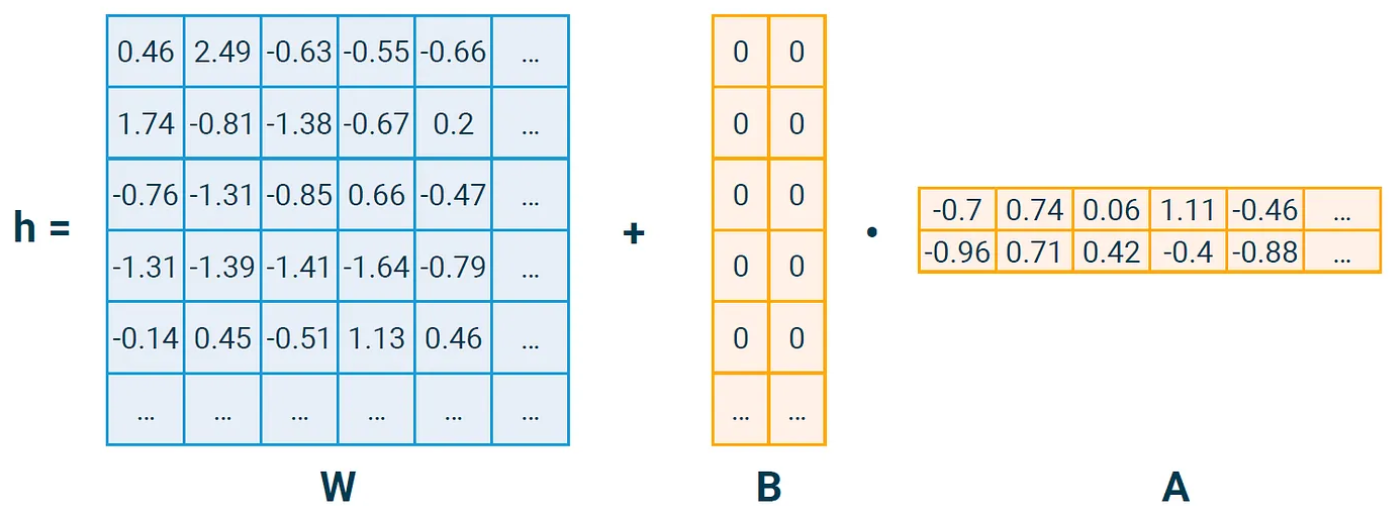
Large Language Models (LLMs) are simply lots of matrices (or tensors) of numbers, represented as matrix W.


**Low intrinsic dimensions**

"common pre-trained models have a very low intrinsic dimension; in other words, there exists a low dimension reparameterization that is as effective for fine-tuning as the full parameter space."
https://arxiv.org/abs/2012.13255


"LoRA authors point out that pretrained large language models have a low “intrinsic dimension” when they are adapted to a new task"

**PEFT supported models**
https://huggingface.co/docs/peft/index#supported-models




### Which Layers to target for LoRA?

The Q, K, V layers of the transformer

https://magazine.sebastianraschka.com/p/practical-tips-for-finetuning-llms

In [2]:
!nvidia-smi

Fri Mar  8 13:35:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# https://github.com/outlines-dev/outlines?tab=readme-ov-file#efficient-json-generation-following-a-pydantic-model

# install outlines



### Step 1: Clear GPU RAM

In [3]:
import torch
import gc

# Explicitly clear PyTorch's cache
torch.cuda.empty_cache()

# Use Python's garbage collector
gc.collect()

# Check allocated and cached memory (optional but useful for confirmation)
print(f"Allocated memory: {torch.cuda.memory_allocated()}")
print(f"Cached memory: {torch.cuda.memory_reserved()}")


Allocated memory: 0
Cached memory: 0


# Fine-tuning


Mistral -
https://www.datacamp.com/tutorial/mistral-7b-tutorial


Mixtral -
https://github.com/brevdev/notebooks/blob/main/mixtral-finetune-own-data.ipynb

https://huggingface.co/docs/transformers/en/training


HF leaderboard of open LLMS:
https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard


1. ARC (AI2 Reasoning Challenge)
Focus: ARC challenges models on grade-school level multiple-choice science questions. It's designed to test a model's reasoning and knowledge.
Relevance to JSON: Indirect. While not about JSON, tasks requiring reasoning over complex structures could indirectly benefit skills useful in JSON generation, especially if the JSON involves logical or knowledge-based content.
2. HellaSwag
Focus: HellaSwag is a benchmark for commonsense reasoning, predicting the endings of a given scenario in both textual and video contexts.
Relevance to JSON: Indirect. This benchmark assesses understanding scenarios and could help in generating structured JSON narratives or scenarios but doesn't directly relate to JSON generation.
3. MMLU (Massive Multitask Language Understanding)
Focus: MMLU evaluates language models across a wide range of subjects and disciplines, testing the model's understanding on diverse topics.
Relevance to JSON: Indirect. While MMLU showcases a model's broad understanding, it doesn't directly inform JSON generation unless the JSON content is highly varied and domain-specific.
4. **TruthfulQA**
Focus: This benchmark tests models on providing truthful answers, focusing on avoiding hallucinations and sticking to factual responses.
Relevance to JSON: Indirect. Truthfulness can be an essential aspect of generating reliable JSON content, especially for applications requiring accurate data representation.
5. Winogrande
Focus: Winogrande is a dataset for commonsense reasoning, designed as an improved and scaled-up version of the Winograd Schema Challenge.
Relevance to JSON: Indirect. Understanding and reasoning about commonsense can be beneficial for generating or interpreting complex JSON structures that mimic real-world scenarios.
6. GSM8K (Grade School Math 8K)
Focus: GSM8K tests models on solving grade-school level math problems presented in textual form.
Relevance to JSON: Indirect. If your JSON generation task involves numerical data or requires reasoning over mathematical content, skills tested by GSM8K could be indirectly relevant.

### Weights & Biases for tracking metrics

Use Weights & Biases to track training metrics. Enter your API key when prompted.

In [3]:
!pip install -q wandb -U

import wandb, os
wandb.login()

wandb_project = "mistral-7b-usace-finetune_v1"
if len(wandb_project) > 0:
    os.environ["WANDB_PROJECT"] = wandb_project

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Load custom dataset


In [ ]:
from datasets import load_dataset

instruct_tune_dataset = load_dataset("mosaicml/instruct-v3")
instruct_tune_dataset

type(instruct_tune_dataset)

instruct_tune_dataset['train']

Dataset({
    features: ['prompt', 'response', 'source'],
    num_rows: 56167
})

In [ ]:
# def create_prompt(sample):
#     bos_token = "<s>"
#     original_system_message = "Below is an instruction that describes a task. Write a response that appropriately completes the request."
#     system_message = "Use the provided input to create an instruction that could have been used to generate the response with an LLM."
#     response = sample["prompt"].replace(original_system_message, "").replace("\n\n### Instruction\n", "").replace("\n### Response\n", "").strip()
#     input = sample["response"]
#     eos_token = "</s>"

#     full_prompt = ""
#     full_prompt += bos_token
#     full_prompt += "### Instruction:"
#     full_prompt += "\n" + system_message
#     full_prompt += "\n\n### Input:"
#     full_prompt += "\n" + input
#     full_prompt += "\n\n### Response:"
#     full_prompt += "\n" + response
#     full_prompt += eos_token

#     return full_prompt

# create_prompt(instruct_tune_dataset["train"][7])



### Convert from OpenAI JSONL to HuggingFace Dataset

https://huggingface.co/transformers/v3.2.0/custom_datasets.html


Load the JSONL file of verified input-output text.

In [ ]:
type(formatted_prompt)

str

In [5]:
from datasets import Dataset
from pathlib import Path
import json
def load_jsonl_to_dataset(jsonl_file_path):
    # Initialize lists to hold the values for each field
    system_messages = []
    user_messages = []
    assistant_messages = []

    # Open and read the JSONL file
    with open(jsonl_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            system_msg = user_msg = assistant_msg = None  # Reset for each entry

            # Iterate over messages and extract content based on role
            for message in data['messages']:
                if message['role'] == 'system':
                    system_msg = message['content']
                elif message['role'] == 'user':
                    user_msg = message['content']
                elif message['role'] == 'assistant':
                    assistant_msg = message['content']

            # Append messages to their respective lists
            system_messages.append(system_msg)
            user_messages.append(user_msg)
            assistant_messages.append(assistant_msg)

    # Construct a dictionary with these lists
    data_dict = {
        'system': system_messages,
        'user': user_messages,
        'assistant': assistant_messages
    }

    # Convert the dictionary to a Hugging Face Dataset
    dataset = Dataset.from_dict(data_dict)

    return dataset


train_dataset = load_jsonl_to_dataset("usace_finetune_training.jsonl")
val_dataset = load_jsonl_to_dataset("usace_finetune_validation.jsonl")

# Displaying the structure of the train dataset as an example
print(f"Train Dataset:\n{train_dataset}")

Train Dataset:
Dataset({
    features: ['system', 'user', 'assistant'],
    num_rows: 88
})


### Prompt formatting function

In [6]:
def create_prompt(sample):
    bos_token = "<s>"
    eos_token = "</s>"

    # Directly access the 'system', 'user', and 'assistant' messages from the sample
    system_message = sample['system'].replace("\n", " ").strip()
    user_message = sample['user'].replace("\n", " ").strip()
    assistant_message = sample['assistant'].replace("\n", " ").strip()

    # Concatenate the prompt according to the specified format
    full_prompt = f"{bos_token}"
    full_prompt += f"### Instruction: \n{system_message}"
    full_prompt += f"\n\n### Input:\n{user_message}"
    full_prompt += f"\n\n### Response:\n{assistant_message}"
    full_prompt += f"{eos_token}"

    return full_prompt
create_prompt(train_dataset[5])


'<s>### Instruction: \n"Task: Extract information from a project description to create a structured dictionary, following the provided JSON schema. Focus on identifying wetland impacts based on the given criteria.  JSON Schema Overview:  wetland_type: Type or descriptor of the wetland (e.g., swamp, marsh). impact_quantity: Numeric value of the impacted area. impact_unit: Units of measurement (acres, sq. feet, linear feet). impact_duration: Duration of impact (permanent, temporary, unknown). impact_type: Nature of impact (harmful, beneficial, unknown). Instructions:  Identify Wetlands and Impacts: Look for sentences detailing the wetland type and area impacted. Record the type, quantity, and unit. Determine Impact Duration: Mark \'permanent\' or \'temporary\' if mentioned with wetland type and area; else, write \'unknown\'. Assess Impact Type: Identify if the impact is harmful, beneficial, or unknown. Avoid Double Counting: Be mindful of nested projects or phrases indicating multiple pr

## Load and Train the Model

https://blog.paperspace.com/mistral-7b-fine-tuning/

In [7]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# torch.set_default_device('cuda')



### Quantization (QLoRA)

https://brev.dev/blog/how-qlora-works

The above article raises a very good point about the democratization of AI.


QLoRA by Dettmers et al., short for quantized LoRA, is a technique that further reduces memory usage during finetuning. During backpropagation, QLoRA quantizes the pretrained weights to 4-bit precision and uses paged optimizers to handle memory spikes.

This author found he saved 33% of GPU memory when using QLoRA, at a cost of 39% increased training runtime. This is caused by the additional quantization/dequantization steps of the pretrained model weights in QLoRA.

![image.png](attachment:image.png)


BFloat16 not supported on V100

In [12]:

nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
  #  bnb_4bit_compute_dtype=torch.bfloat16
)

### Load model and Tokenizer

In [16]:
model_name = "mistralai/Mistral-7B-Instruct-v0.1"

# "stabilityai/stablelm-3b-4e1t" - No quantization?

# 'EleutherAI/gpt-neo-1.3B'

model = AutoModelForCausalLM.from_pretrained(model_name,
# ,
    device_map='auto',
    load_in_4bit=True,

    quantization_config=nf4_config,
    use_cache=False

)

tokenizer = AutoTokenizer.from_pretrained(model_name)
    #    padding_side="left",
    # add_eos_token=True,
    # add_bos_token=True,

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

## Step 3: Tokenization

Before training, you need to tokenize your dataset. The tokenizer will convert your text into a format that's suitable for the model to process:


**Newline Characters**

- When tokenizing text, newline characters are treated as whitespace and are used to separate tokens. For many models, especially those trained on a wide variety of internet text (like GPT, BERT, etc.), encountering newline characters is expected and won't cause issues.

- For some tasks, newline characters might carry semantic meaning (e.g., separating paragraphs or items in a list), which could be relevant for the model to understand the structure of the input text.


### Padding - affects compute requirements

In [ ]:
# https://www.philschmid.de/fine-tune-llms-in-2024-with-trl

In [ ]:

token = ""

# set max length of sequence
max_length=968


tokenizer.pad_token = tokenizer.eos_token

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"],
                     max_length=max_length,padding="max_length", truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)


### Distribution of text lengths

In [12]:
import matplotlib.pyplot as plt


# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"],
                     max_length=max_length,padding="max_length", truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

## PEFT - LoRA


### Set the LoRa Config

In [17]:
from peft import LoraConfig, get_peft_model

peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.08,
    r=64,
    # target_modules=["q_proj"],
    #     "k_proj",
    #     "v_proj",
    #     "o_proj",
    #     "w1",
    #     "w2",
    #     "w3",
    #     "lm_head",
    # ],
    bias="none",
    task_type="CAUSAL_LM"
)

In [18]:
## prepare model for kbit
from peft import prepare_model_for_kbit_training


model = prepare_model_for_kbit_training(model)

# model.to('cuda')

### Note: `to_device()` not supported for `4-bit` or `8-bit` bitsandbytes

In [20]:
model.to('cuda')

In [12]:
# ONLY RUN this step to see the model - introduces errors


model = get_peft_model(model, peft_config)
model

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPTNeoBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
            (v_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
            (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
            (out_proj): Linear4bit(in_features=2048, out_features=2048, bias=True)
          )
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear4bit(in_features=2048, out_features=8192, bias=True)

### How many trainable parameters?

In [19]:
model.print_trainable_parameters()

### Training hyperparameters

In [21]:
from transformers import TrainingArguments
args = TrainingArguments(
  output_dir = "mistral_instruct_generation",
  #num_train_epochs=5,
  max_steps = 100,
  per_device_train_batch_size = 1,
  gradient_accumulation_steps = 4,
  # gradient_checkpointing = True,
  fp16 = True,
  # gradient_checkpointing_steps = 10,
  warmup_steps = 0.03,
  logging_steps=10,
  save_strategy="epoch",
  #evaluation_strategy="epoch",
  evaluation_strategy="steps",
  eval_steps=40,
  learning_rate=2e-4,
  bf16=False,
  lr_scheduler_type='constant',
)

Let's print the model to examine its layers, as we will apply QLoRA to all the linear layers of the model. Those layers are q_proj, k_proj, v_proj, o_proj, w1, w2, w3, and lm_head.

r is the rank of the low-rank matrix used in the adapters, which thus controls the number of parameters trained. A higher rank will allow for more expressivity, but there is a compute tradeoff.

alpha is the scaling factor for the learned weights. The weight matrix is scaled by alpha/r, and thus a higher value for alpha assigns more weight to the LoRA activations.

The values used in the QLoRA paper were r=64 and lora_alpha=16, and these are said to generalize well, but we will use r=32 and lora_alpha=64 so that we have more emphasis on the new fine-tuned data while also reducing computational complexity.

## RUN TRAINING!


Note: PyTorch Generator CUda-CPU error
https://stackoverflow.com/questions/68621210/runtimeerror-expected-a-cuda-device-type-for-generator-but-found-cpu

Need dataloader

In [21]:
# dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=2,
#                                          shuffle=True, num_workers=2, pin_memory=False,
#                                          generator=torch.Generator(device='cuda'))

In [22]:
from trl import SFTTrainer

max_seq_length = 1024

trainer = SFTTrainer(
  model=model,
  peft_config=peft_config,
  max_seq_length=max_seq_length,
  tokenizer=tokenizer,
  packing=True,
  formatting_func=create_prompt,
  args=args,
  dataset_text_field="text",
  train_dataset=train_dataset,
  eval_dataset= val_dataset,
  # instruct_tune_dataset["test"]
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/utils.py:548: UserWarning: The passed formatting_func has more than one argument. Usually that function should have a single argument `example` which corresponds to the dictionary returned by each element of the dataset. Make sure you know what you are doing.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:267: UserWarning: You passed `packing=True` to the SFTTrainer, and you are training your model with `max_steps` strategy. The dataset will be iterated until the `max_steps` are reached.
  warnings.warn(


In [23]:
import time
start = time.time()
trainer.train()
print(time.time()- start)

wandb: Currently logged in as: hk939. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/trl/trainer/utils.py:570: UserWarning: The dataset reached end and the iterator is reset to the start.
  warnings.warn("The dataset reached end and the iterator is reset to the start.")
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input t

Step,Training Loss,Validation Loss
40,0.877000,1.068717
80,0.703600,1.002537


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <trl.trainer.utils.ConstantLengthDataset object at 0x7a772d9cc160> was reported to be 88 (when accessing len(dataloader)), but 89 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <trl.trainer.utils.ConstantLengthDataset object at 0x7a772d9cc160> was reported to be 88 (when accessing len(dataloader)), but 90 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <trl.trainer.utils.ConstantLengthDataset object at 0x7a772d9cc160> was reported to be 88 (when accessing len(dataloader)), but 91 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of Iter

542.4559228420258


In [ ]:
# dataloader = torch.utils.data.DataLoader(tokenized_train_dataset, batch_size=2,
#                                          shuffle=False, num_workers=2)
# from accelerate import infer_auto_device_map, dispatch_model
# device_map = infer_auto_device_map(
#     model,
#     dtype='float16'
# )

# model = dispatch_model(model, device_map=device_map)

In [32]:
import torch
print(torch.__file__)

from accelerate import Accelerator
accelerator = Accelerator()
device = accelerator.device

/usr/local/lib/python3.10/dist-packages/torch/__init__.py


### Success!

In [24]:
# save model
trainer.model.save_pretrained("mistral_ft_8mar")
wandb.finish()
model.config.use_cache = True

eval/loss,█▁
eval/runtime,█▁
eval/samples_per_second,▁█
eval/steps_per_second,▁█
train/epoch,▁▂▃▃▃▄▅▆▆▆▇██
train/global_step,▁▂▃▃▃▄▅▆▆▆▇██
train/learning_rate,▁▁▁▁▁▁▁▁▁▁
train/loss,█▅▄▃▃▃▃▁▁▂
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁


## Inference

In [26]:
model

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.08, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=4096, out_features=64, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=64, out_features=4096, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
          )
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.08, inplace=False)
         

In [25]:
# logging.set_verbosity(logging.CRITICAL)
from transformers import pipeline
prompt = "Extract to JSON: The applicant has requested Department of the Army authorization to clear, grade and fill in order to expand an ex isting sand and gravel mining operation in Grangeville, Louisian a.The proposed sand and gra vel pits will encompass approximately 56.5 ac res and will be dug to adepth of 35 feet with 3:1 side slopes.Approximately 47,430 cubic yards of dirt, sand and gravel will be excavated and placed on upland areas of the site.It is anticipated that the proposed activity will impact approximately 1.47 acres of forested wetlands.It is presumed that the applicant has designed the project to a void and minimize direct and secondary adverse impacts tothe maximum extent practicable .As compensation forunavoidable wetland impacts, the applicant proposes to mitigatein-kind wetland credits from a Corps approved mitigat ion bank located in the watershed."
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=600)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


<s>[INST] Extract to JSON: The applicant has requested Department of the Army authorization to clear, grade and fill in order to expand an ex isting sand and gravel mining operation in Grangeville, Louisian a.The proposed sand and gra vel pits will encompass approximately 56.5 ac res and will be dug to adepth of 35 feet with 3:1 side slopes.Approximately 47,430 cubic yards of dirt, sand and gravel will be excavated and placed on upland areas of the site.It is anticipated that the proposed activity will impact approximately 1.47 acres of forested wetlands.It is presumed that the applicant has designed the project to a void and minimize direct and secondary adverse impacts tothe maximum extent practicable .As compensation forunavoidable wetland impacts, the applicant proposes to mitigatein-kind wetland credits from a Corps approved mitigat ion bank located in the watershed. [/INST] {
  "wetlands": [
    {
      "wetland_type": "forested wetlands",
      "impact_quantity": "1.47",
      "

In [ ]:
# # Save trained model

# #https://www.kaggle.com/code/lucamassaron/fine-tune-mistral-v0-2-for-sentiment-analysis

# args=transformers.TrainingArguments(
#         output_dir=output_dir,
#         warmup_steps=1,
#         per_device_train_batch_size=2,
#         gradient_accumulation_steps=1,
#         gradient_checkpointing=True,
#         max_steps=125,
#         learning_rate=2.5e-5, # Want a small lr for finetuning
#         fp16=True,
#         optim="paged_adamw_8bit",
#         logging_steps=25,              # When to start reporting loss
#         logging_dir="./logs",        # Directory for storing logs
#         save_strategy="steps",       # Save the model checkpoint every logging step
#         save_steps=25,                # Save checkpoints every 50 steps
#         evaluation_strategy="steps", # Evaluate the model every logging step
#         eval_steps=25,               # Evaluate and save checkpoints every 50 steps
#         do_eval=True,                # Perform evaluation at the end of training
#         report_to="wandb",           # Comment this out if you don't want to use weights & baises
#         run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
#     ),
   

In [ ]:
# https://www.kaggle.com/code/lucamassaron/fine-tune-mistral-v0-2-for-sentiment-analysis